# Shi-Tomasi Corner Detection
***


## Setup

In [1]:
#notebook imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

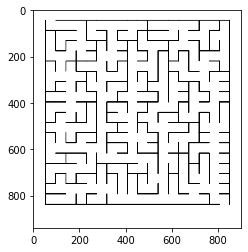

In [67]:
# loading in images
maze = cv2.imread('../Image_Data/maze.png')
maze = cv2.cvtColor(maze, cv2.COLOR_BGR2RGB)
maze_result = maze.copy()
maze_result_cv = maze.copy()
gray_maze = cv2.cvtColor(maze, cv2.COLOR_RGB2GRAY)
gray_maze = np.float32(gray_maze)
plt.imshow(gray_maze, cmap='gray')

In [3]:
# method to viewed images larger, used to enlarge crossword images 
def view_pic(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

***
## Manual Shi-Tomasi Corner Detection

In [68]:
# similar to Harris, first take derivatives using Sobel operator
sobelx = cv2.Sobel(gray_maze, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
sobelx2 = sobelx * sobelx

sobely = cv2.Sobel(gray_maze, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
sobely2 = sobely * sobely

sobelxy = sobelx * sobely

In [69]:
rows, cols = gray_maze.shape
R = np.zeros((rows, cols))

In [70]:
# fix this for Eigenvalues calculation
for row in range(1, rows - 1):
    for col in range(1, cols - 1):
        M = np.array([[np.sum(sobelx2[row-1:row+2, col-1:col+2]), np.sum(sobelxy[row-1:row+2, col-1:col+2])], 
                     [np.sum(sobelxy[row-1:row+2, col-1:col+2]), np.sum(sobely2[row-1:row+2, col-1:col+2])]], 
                     dtype=np.float32)
        eigenvals = np.linalg.eig(M)[0]
        R[row, col] = 255 if eigenvals.min() > 15000 else 0

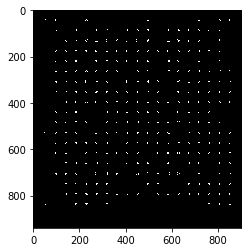

In [71]:
plt.imshow(R, cmap='gray')

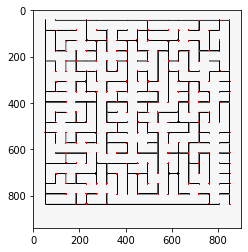

In [72]:
maze_result[R == 255] = [255, 0, 0]
plt.imshow(maze_result)

In [58]:
#opencv syntax
maze_corners = cv2.goodFeaturesToTrack(image=gray_maze, maxCorners=10000, qualityLevel=0.01, minDistance=5)

In [59]:
maze_corners = np.int0(maze_corners)

In [60]:
for corner in maze_corners:
    cv2.circle(img=maze_result_cv, center=(corner[0,0], corner[0,1]), radius=2, color=(255, 0, 0), thickness=-1)

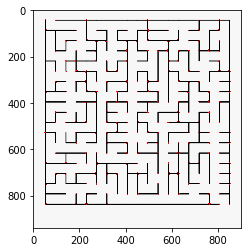

In [61]:
plt.imshow(maze_result_cv)